In [21]:
import pandas as pd
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"
SPECIFIC_DAY = "2023-07-29"

# Analyse the attendance at spiaggia

In [4]:
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df["date"] = pd.to_datetime(contapersone_presenze_df["date"]) # or contapersone_presenze_df["date"].map(pd.to_datetime)
#contapersone_presenze_df = contapersone_presenze_df[(contapersone_presenze_df['date'] >= START_DATE) & (contapersone_presenze_df['date'] <= END_DATE)] 

varchi = contapersone_presenze_df['varco'].unique()
contapersone = contapersone_presenze_df.copy()
for v in varchi:
    contapersone[v] = contapersone['presenze'] * (contapersone['varco'] == v)
contapersone = contapersone.drop(columns=['varco']).groupby('date').sum().reset_index().rename(columns={'presenze':'contapersone'})
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419


In [5]:
print(f"Standard deviation: {contapersone['contapersone'].std()}, Mean: {contapersone['contapersone'].mean()}")

Standard deviation: 1029.2480119904706, Mean: 2238.5285714285715


In [6]:
scaler = MinMaxScaler()
contapersone["contapersone_scaled"] = scaler.fit_transform(contapersone[["contapersone"]])
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9,contapersone_scaled
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140,0.190840
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250,0.355471
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359,0.233333
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238,0.196438
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276,0.152417
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332,0.085242
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321,0.183715
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523,0.242494
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419,0.416285


## Vodafone attendances

In [7]:
LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_COMUNE_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

attendances_timeframe_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2977735,2023-07-01,TN_MKT_AL_3,27,AUT,TOURIST,A,18
2977736,2023-07-01,TN_MKT_AL_3,27,AUT,VISITOR,A,18
2977744,2023-07-01,TN_MKT_AL_3,27,CZE,TOURIST,CZ,108
2977745,2023-07-01,TN_MKT_AL_3,27,CZE,VISITOR,CZ,36
2977746,2023-07-01,TN_MKT_AL_3,27,DEU,TOURIST,DE,216
...,...,...,...,...,...,...,...
3622979,2023-09-30,TN_MKT_POI,LAGO_MOLV,FRA,VISITOR,UE,22
3622985,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,TOURIST,IT,858
3622986,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,VISITOR,IT,809
3622994,2023-09-30,TN_MKT_POI,LAGO_MOLV,POL,TOURIST,PL,18


### Compare the ratio of tourists on the beach to the tourists in Molveno

In [9]:
grouped_vodafone_presences = vodafone_attendences_df.groupby(["date", "locId", "userProfile"])[["value"]].sum().reset_index()
grouped_vodafone_presences

,date,locId,userProfile,value
0,2022-01-01,100,COMMUTER,250
1,2022-01-01,100,INHABITANT,5749
2,2022-01-01,100,TOURIST,17429
3,2022-01-01,100,VISITOR,5929
4,2022-01-01,101,COMMUTER,308
...,...,...,...,...
478703,2024-03-31,STAZ_ROVE,VISITOR,1002
478704,2024-03-31,STAZ_TREN,COMMUTER,189
478705,2024-03-31,STAZ_TREN,INHABITANT,1561
478706,2024-03-31,STAZ_TREN,TOURIST,332


In [10]:
# presences in Molveno
vod_presences_molveno = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_MOLVENO]
vod_presences_molveno

,date,locId,userProfile,value
318,2022-01-01,27,COMMUTER,80
319,2022-01-01,27,INHABITANT,1115
320,2022-01-01,27,TOURIST,4550
321,2022-01-01,27,VISITOR,3130
895,2022-01-02,27,COMMUTER,68
...,...,...,...,...
477864,2024-03-30,27,VISITOR,623
478446,2024-03-31,27,COMMUTER,22
478447,2024-03-31,27,INHABITANT,785
478448,2024-03-31,27,TOURIST,930


In [11]:
# presences on the beach
vod_presences_lago = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_LAGO_MOLVENO]
vod_presences_lago

,date,locId,userProfile,value
552,2022-01-01,LAGO_MOLV,COMMUTER,53
553,2022-01-01,LAGO_MOLV,INHABITANT,755
554,2022-01-01,LAGO_MOLV,TOURIST,3375
555,2022-01-01,LAGO_MOLV,VISITOR,1565
1129,2022-01-02,LAGO_MOLV,COMMUTER,51
...,...,...,...,...
478102,2024-03-30,LAGO_MOLV,VISITOR,327
478682,2024-03-31,LAGO_MOLV,COMMUTER,0
478683,2024-03-31,LAGO_MOLV,INHABITANT,767
478684,2024-03-31,LAGO_MOLV,TOURIST,848


In [12]:
import numpy as np
merged_presences_molveno_lago = vod_presences_molveno.merge(vod_presences_lago, on=["date", "userProfile"], suffixes=('_molveno', '_lago'))
merged_presences_molveno_lago["date"] = pd.to_datetime(merged_presences_molveno_lago["date"])
merged_presences_molveno_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago
0,2022-01-01,27,COMMUTER,80,LAGO_MOLV,53
1,2022-01-01,27,INHABITANT,1115,LAGO_MOLV,755
2,2022-01-01,27,TOURIST,4550,LAGO_MOLV,3375
3,2022-01-01,27,VISITOR,3130,LAGO_MOLV,1565
4,2022-01-02,27,COMMUTER,68,LAGO_MOLV,51
...,...,...,...,...,...,...
3271,2024-03-30,27,VISITOR,623,LAGO_MOLV,327
3272,2024-03-31,27,COMMUTER,22,LAGO_MOLV,0
3273,2024-03-31,27,INHABITANT,785,LAGO_MOLV,767
3274,2024-03-31,27,TOURIST,930,LAGO_MOLV,848


In [13]:
merged_presences_molveno_lago["ratio_lago_comune"] = (merged_presences_molveno_lago["value_lago"] / merged_presences_molveno_lago["value_molveno"]) * 100
merged_presences_molveno_lago = merged_presences_molveno_lago[
    (merged_presences_molveno_lago["date"] >= START_DATE) &
    (merged_presences_molveno_lago["date"] <= END_DATE) &
    (merged_presences_molveno_lago["userProfile"].isin(["TOURIST", "VISITOR"]))
]    
merged_presences_molveno_lago = merged_presences_molveno_lago[merged_presences_molveno_lago["date"].isin(contapersone["date"])]

merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].replace(np.inf, 0).fillna(0)
merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].apply(lambda el: int(el))
merged_presences_molveno_lago.sort_values(by=["ratio_lago_comune"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90
...,...,...,...,...,...,...,...
2494,2023-09-16,27,VISITOR,2823,LAGO_MOLV,1634,57
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56
2314,2023-08-02,27,VISITOR,3327,LAGO_MOLV,1853,55
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55


In [14]:
tourists_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "TOURIST"]
excursionist_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "VISITOR"]
#scaler for tourists values
tourists_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(tourists_presences[["ratio_lago_comune"]]) 
tourists_presences["presenze_lago"] = scaler.fit_transform(tourists_presences[["value_lago"]]) 
tourists_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93,1.000000,0.956546
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92,0.933333,1.000000
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91,0.866667,0.607242
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90,0.800000,0.524234
2293,2023-07-28,27,TOURIST,3707,LAGO_MOLV,3322,89,0.733333,0.623120
...,...,...,...,...,...,...,...,...,...
2497,2023-09-17,27,TOURIST,2044,LAGO_MOLV,1635,79,0.066667,0.153203
2517,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,0.066667,0.259053
2501,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78,0.000000,0.000000
2509,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78,0.000000,0.083287


In [15]:
excursionist_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(excursionist_presences[["ratio_lago_comune"]]) 
excursionist_presences["presenze_lago"] = scaler.fit_transform(excursionist_presences[["value_lago"]]) 
excursionist_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96,1.000000,0.005193
2482,2023-09-13,27,VISITOR,644,LAGO_MOLV,585,90,0.853659,0.003895
2518,2023-09-22,27,VISITOR,646,LAGO_MOLV,561,86,0.756098,0.000000
2414,2023-08-27,27,VISITOR,1498,LAGO_MOLV,1200,80,0.609756,0.103700
2514,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76,0.512195,0.046900
...,...,...,...,...,...,...,...,...,...
2306,2023-07-31,27,VISITOR,3289,LAGO_MOLV,1895,57,0.048780,0.216488
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56,0.024390,0.249594
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55,0.000000,0.253002
2278,2023-07-24,27,VISITOR,1820,LAGO_MOLV,1003,55,0.000000,0.071730


<AxesSubplot: xlabel='value_lago', ylabel='ratio_lago_comune'>

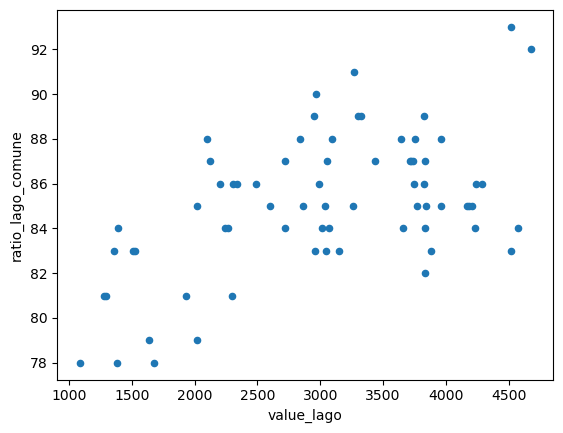

In [16]:
tourists_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

<AxesSubplot: xlabel='value_lago', ylabel='ratio_lago_comune'>

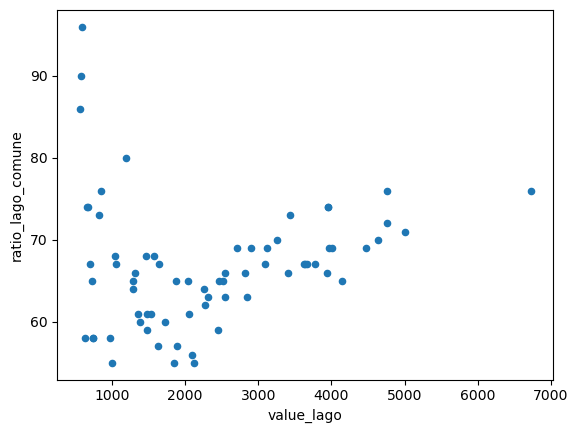

In [17]:
excursionist_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

In [18]:
excursionist_presences.describe()

,date,value_molveno,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
count,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2023-08-18 12:00:00,3457.685714,2323.757143,66.742857,0.286411,0.286069
min,2023-07-15 00:00:00,617.000000,561.000000,55.000000,0.000000,0.000000
25%,2023-08-01 06:00:00,1964.000000,1286.500000,61.250000,0.152439,0.117738
50%,2023-08-18 12:00:00,3423.000000,2077.000000,66.000000,0.268293,0.246024
75%,2023-09-04 18:00:00,4677.000000,3371.250000,69.000000,0.341463,0.456061
max,2023-09-22 00:00:00,8808.000000,6723.000000,96.000000,1.000000,1.000000
std,NaN,1889.485871,1366.318596,7.673946,0.187169,0.221733


<AxesSubplot: xlabel='date'>

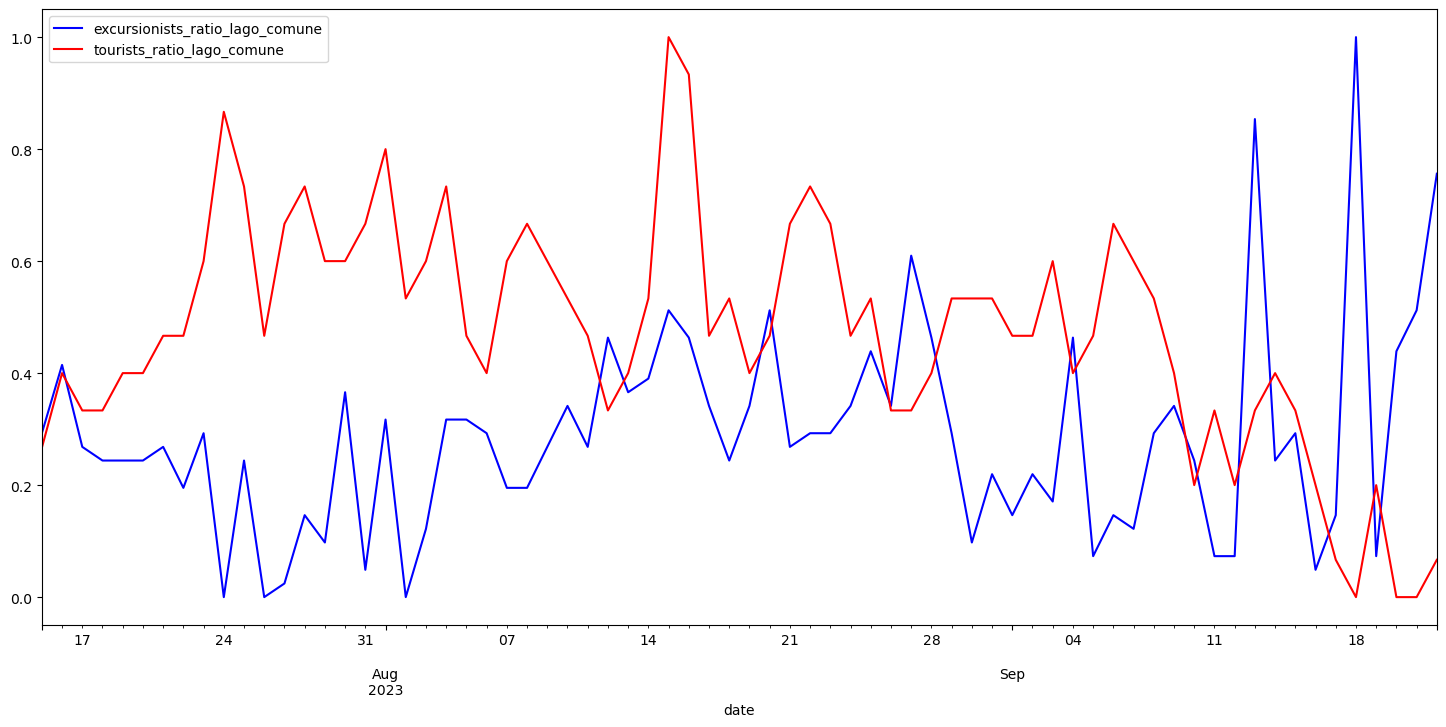

In [19]:
#TODO
ax = excursionist_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune", color="blue")
tourists_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune", color="red", figsize=(18, 8))

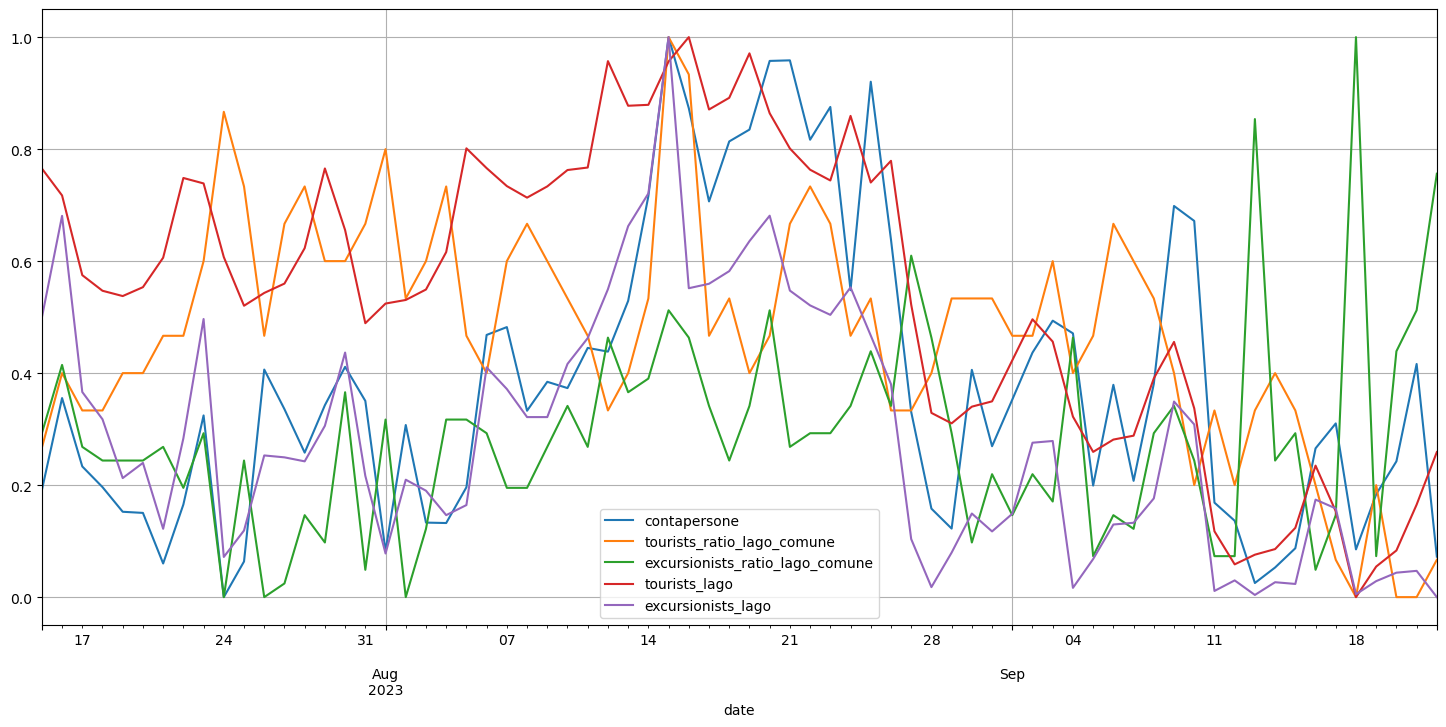

In [22]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
tourists_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune")
excursionist_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune")

tourists_presences[["date", "presenze_lago"]].plot(ax=ax,x="date", y="presenze_lago", label="tourists_lago")
excursionist_presences[["date", "presenze_lago"]].plot(ax=ax, x="date", y="presenze_lago", label="excursionists_lago", figsize=(18,8))
plt.grid()

In [23]:
correlation_entities = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_excusrionists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_tourists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_tourists"}),
    contapersone[["date", "contapersone_scaled"]].set_index("date")
], axis=1)
correlation_entities.corr()

,ratio_lago_comune_scaled_excursionists,presenze_lago_excusrionists,ratio_lago_comune_scaled_tourists,presenze_lago_tourists,contapersone_scaled
ratio_lago_comune_scaled_excursionists,1.000000,0.109677,-0.298525,0.012172,0.125345
presenze_lago_excusrionists,0.109677,1.000000,0.350007,0.842538,0.775338
ratio_lago_comune_scaled_tourists,-0.298525,0.350007,1.000000,0.533939,0.272408
presenze_lago_tourists,0.012172,0.842538,0.533939,1.000000,0.597868
contapersone_scaled,0.125345,0.775338,0.272408,0.597868,1.000000


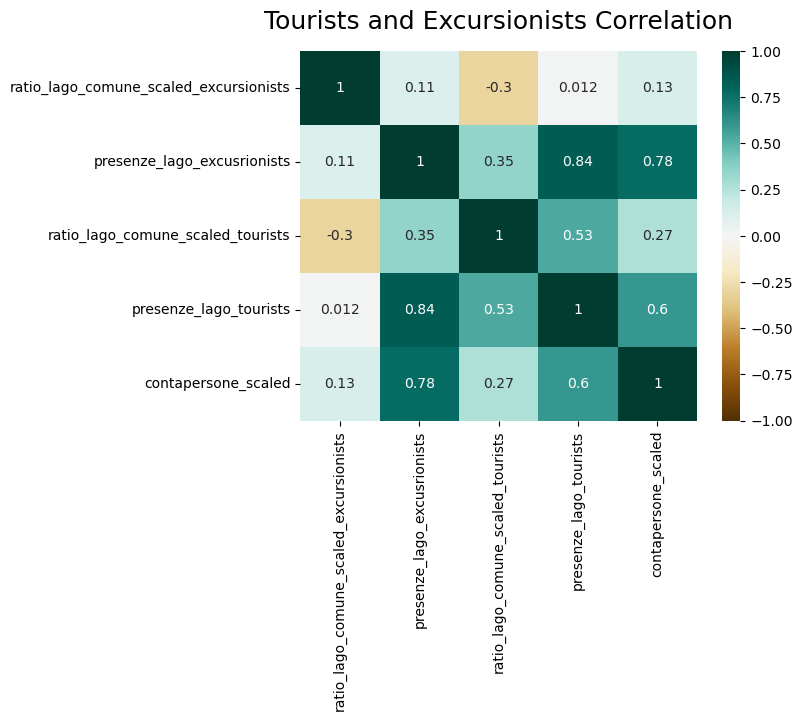

In [24]:
import seaborn as sns
heatmap = sns.heatmap(correlation_entities.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tourists and Excursionists Correlation', fontdict={'fontsize':18}, pad=16);

## Vodafone attendances Stranieri (consider also this info)

In [37]:
vodafone_attendences_STR = vodafone_attendences_STR_df[
    (vodafone_attendences_STR_df["date"] >= START_DATE) &
    (vodafone_attendences_STR_df["date"] <= END_DATE) &
    (vodafone_attendences_STR_df["value"] != 0) &
    (vodafone_attendences_STR_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_STR_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_STR_df["locId"] == LOC_ID_APT_MOLVENO) | 
         (vodafone_attendences_STR_df["locId"] == LOC_ID_COMUNE_MOLVENO) | 
         (vodafone_attendences_STR_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
vodafone_attendences_STR

,date,locType,locId,userCountry,userProfile,userCluster,value
201689,2023-07-01,TN_MKT_AL_3,27,STR,TOURIST,STR,735
201690,2023-07-01,TN_MKT_AL_3,27,STR,VISITOR,STR,360
201847,2023-07-01,TN_MKT_AM_22,105,STR,TOURIST,STR,2928
201848,2023-07-01,TN_MKT_AM_22,105,STR,VISITOR,STR,1754
201870,2023-07-01,TN_MKT_POI,LAGO_MOLV,STR,TOURIST,STR,581
...,...,...,...,...,...,...,...
237379,2023-09-30,TN_MKT_AL_3,27,STR,VISITOR,STR,581
237537,2023-09-30,TN_MKT_AM_22,105,STR,TOURIST,STR,3941
237538,2023-09-30,TN_MKT_AM_22,105,STR,VISITOR,STR,1976
237560,2023-09-30,TN_MKT_POI,LAGO_MOLV,STR,TOURIST,STR,934


# Factors that may affect attendances at apiaggia

## Events


In [26]:
manifestazioni_df2 = manifestazioni_df[(manifestazioni_df["nr"] != "0") & (manifestazioni_df["nr"] != "0.0")]
manifestazioni_df2

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000.0,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08 00:00:00,2023-09-10 00:00:00,3500.0,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part
12,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2024-01-27 00:00:00,2024-03-16 00:00:00,6000,96000.0,96000.0,non serve,52,0.1,9600,2024_first_part
13,29,Trentino Mountain Bike Associazione Sportiva D...,15° Circuito Trentino MTB,0,2024-06-09 00:00:00,2024-10-30 00:00:00,25000,62000.0,62000.0,non serve,80.5,0.15,9300,2024_first_part


In [27]:
manifestazioni_df2["data_manifestazione_inizio"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_inizio"])
manifestazioni_df2["data_manifestazione_fine"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_fine"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "tot_participants", "participants"])
manifestazioni_df2["partecipanti_dichiarati"] = manifestazioni_df2["partecipanti_dichiarati"].astype(float).astype(int)
manifestazioni_filtered_df = manifestazioni_df2[manifestazioni_df2["data_manifestazione_inizio"] < "2024-01-27 00:00:00"]
manifestazioni_filtered_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12,2023-03-18,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16,2023-03-19,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26,2023-07-08,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21,2023-04-22,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21,2023-09-24,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05,2023-08-20,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09,2023-09-09,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08,2023-09-10,3500,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part


In [29]:
D = "D"
for event in manifestazioni_filtered_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    random_participants = 0
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)       
        mean_nr = participants/len(date_list)
        for date in date_list:
            random_participants = np.random.randint(0, mean_nr)            
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "tot_participants": participants, "participants": random_participants}
            eventi.loc[len(eventi)] = row
eventi = eventi[(eventi["date"] >= START_DATE) & (eventi["date"] < END_DATE)]
eventi

,event_name,date,organizer,location,tot_participants,participants
16,Scuola Estiva Internazionale Royal Academy of ...,2023-07-01,Royal Academy of Dance srl,Altopiano Paganella,1500,80
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500,13
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500,39
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500,54
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500,33
...,...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000,84
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300,981
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,1021
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,714


In [30]:
eventi["scaled_total_participants"] = scaler.fit_transform(eventi[["tot_participants"]]) 
eventi["scaled_daily_participants"] = scaler.fit_transform(eventi[["participants"]]) 

<AxesSubplot: xlabel='date'>

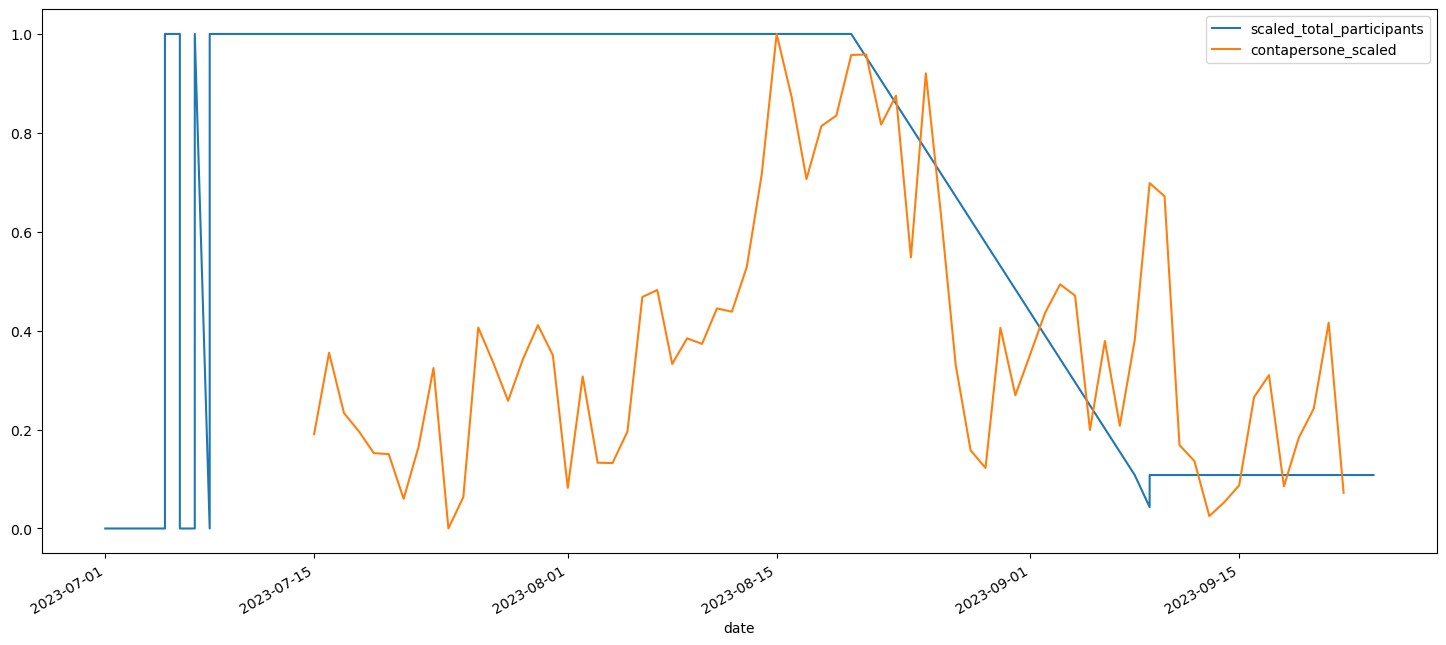

In [31]:
ax = eventi.plot(x="date", y="scaled_total_participants", figsize=(18,8))
contapersone[["date", "contapersone_scaled"]].plot(ax=ax, x="date", y="contapersone_scaled", figsize=(18,8))
#eventi.plot(ax=ax, x="date", y="scaled_daily_participants", figsize=(18,8)) #this is a random generated number

## Meteo

In [32]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= END_DATE)
]

In [33]:
meteo_timeframe_df["tmin_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmin"]])
meteo_timeframe_df["tmax_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmax"]])
meteo_timeframe_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled
36742,2023-07-01,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,24,media,moderata,media,media,moderata,media,0.666667,0.529412
36784,2023-07-04,MOLVENO,DOLOMITI,Nuvoloso,13,23,molto bassa,debole,molto bassa,media,moderata,media,0.583333,0.470588
36806,2023-07-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,12,23,media,debole,media,alta,moderata,alta,0.500000,0.470588
36816,2023-07-08,MOLVENO,DOLOMITI,Poco nuvoloso,13,26,media,debole,molto bassa,bassa,debole,bassa,0.583333,0.647059
36841,2023-07-11,MOLVENO,DOLOMITI,Poco nuvoloso,18,31,molto bassa,debole,molto bassa,bassa,debole,bassa,1.000000,0.941176
36863,2023-07-14,MOLVENO,DOLOMITI,Poco nuvoloso,12,26,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.500000,0.647059
36885,2023-07-15,MOLVENO,DOLOMITI,Sereno,13,27,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.583333,0.705882
36907,2023-07-16,MOLVENO,DOLOMITI,Sereno,14,27,molto bassa,debole,molto bassa,bassa,debole,bassa,0.666667,0.705882
36929,2023-07-17,MOLVENO,DOLOMITI,Poco nuvoloso,16,28,molto bassa,debole,molto bassa,bassa,debole,bassa,0.833333,0.764706
36951,2023-07-19,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,15,28,bassa,debole,bassa,alta,moderata,alta,0.750000,0.764706


<AxesSubplot: xlabel='date'>

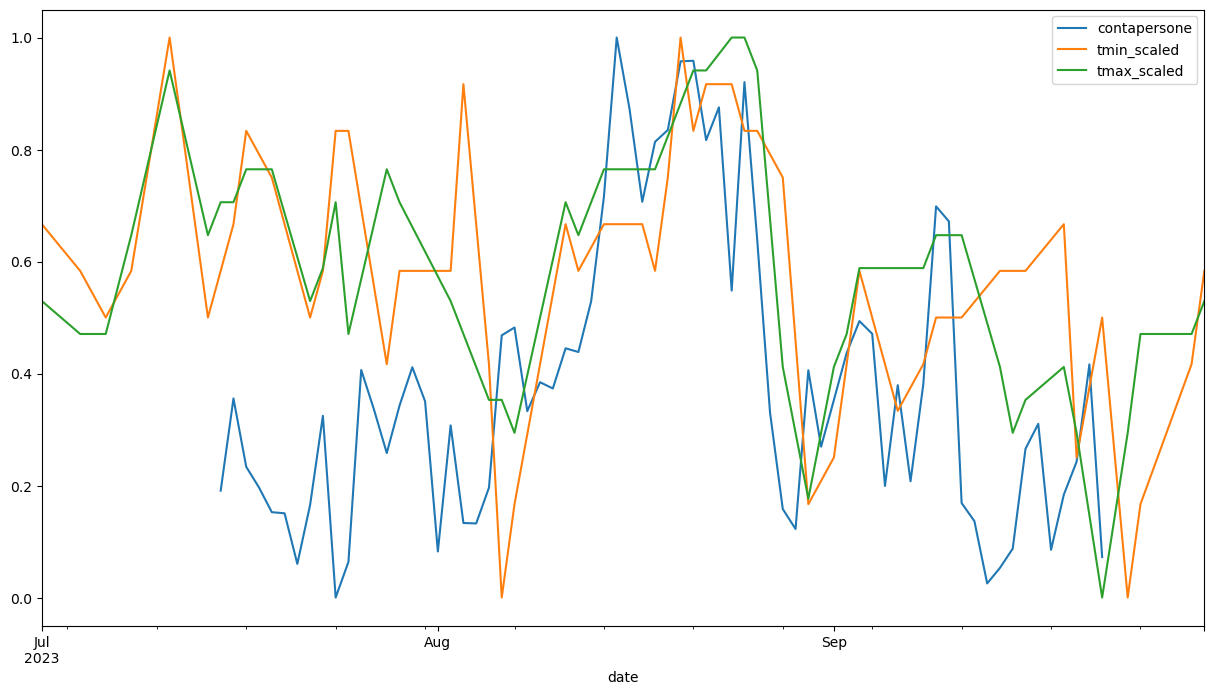

In [34]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
meteo_timeframe_df.plot(ax=ax, x="date", y="tmin_scaled", figsize=(15, 8))
meteo_timeframe_df.plot(ax=ax, x="date", y="tmax_scaled", figsize=(15, 8))


In [35]:
correlation_df = pd.concat([
    meteo_timeframe_df[["date", "tmin_scaled", "tmax_scaled"]].set_index("date"),
    contapersone[["date", "contapersone_scaled"]].set_index("date")    
], axis=1)
correlation_df.corr()

,tmin_scaled,tmax_scaled,contapersone_scaled
tmin_scaled,1.000000,0.667118,0.221367
tmax_scaled,0.667118,1.000000,0.617659
contapersone_scaled,0.221367,0.617659,1.000000


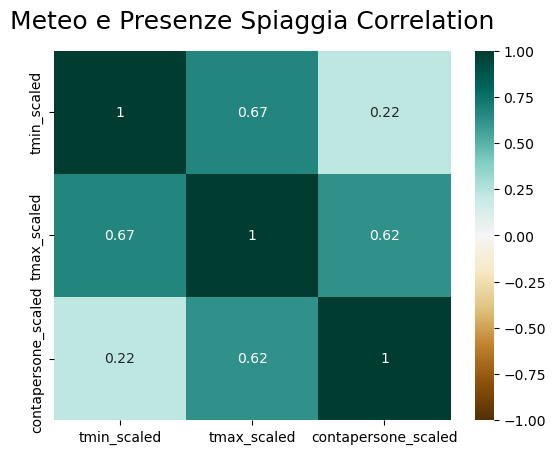

In [36]:
heatmap = sns.heatmap(correlation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Meteo e Presenze Spiaggia Correlation', fontdict={'fontsize':18}, pad=16);

### Principal Component Analysis 

## Timeframe of one week before ferragosto

## Timeframe of the week of ferragosto

## Timeframe of one week after ferragosto


## Weekend days vs weekdays

## Holidays